In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# update import path
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..', 'src'))

import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.cross_validation import train_test_split

# import keras modules
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras import losses

/Users/wouter/anaconda2/envs/aicaptain/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [11]:
# read csv
data = pd.read_csv(os.path.join('..', 'data', 'logs', 'history_20180920_2048.csv'), index_col=0)

# make datetime index (could also be done directly in read_csv)
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.set_index('datetime')

print (data.shape)
data.head()

(2871, 9)


,angle_of_attack,boat_angle,boat_heel,boat_speed,course_error,rudder_angle,target_angle,wind_direction,wind_speed
datetime,,,,,,,,,
2018-09-20 20:45:59.452643,-134.782311,359.857720,7.113987,3.323698,-53.457968,0.0,53.315688,225.075410,10.047482
2018-09-20 20:45:59.509601,-135.006638,359.726539,6.559087,3.147551,-53.589149,0.0,53.315688,224.719901,9.298342
2018-09-20 20:45:59.556174,-134.863192,359.587913,6.931284,3.265973,-53.727775,0.0,53.315688,224.724721,9.802627
2018-09-20 20:45:59.600429,-133.844020,359.446388,7.076224,3.287020,-53.869299,0.0,53.315688,225.602369,9.834713
2018-09-20 20:45:59.645215,-133.757048,359.305141,7.062364,3.280329,-54.010547,0.0,53.315688,225.548093,9.801056


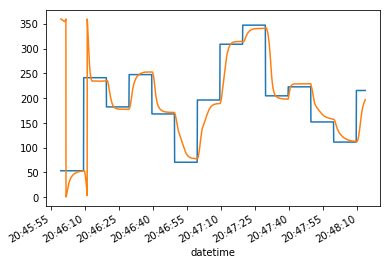

In [12]:
# show the boat approaching the target course
data['target_angle'].plot()
data['boat_angle'].plot()

In [13]:
# select features and target
y = data['rudder_angle']

### CHOOSE FEATURES TO USE ###
x = data[[...]]

# split test/train sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

# create model
model = Sequential([
    ### ADD YOUR LAYERS HERE ###
])

### CHOOSE LOSS FUNCTION AND OPTIMIZER ###
model.compile(loss='...', optimizer='...')

# show summary of the model
model.summary()

# fit model to training data
model.fit(x_train, y_train, validation_split=0.2, epochs=20)

# show performance
pred_y = model.predict(x_test)
print (mean_absolute_error(pred_y, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               768       
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 33,921
Trainable params: 33,921
Non-trainable params: 0
_________________________________________________________________
Train on 2066 samples, validate on 517 samples
Epoch 1/20
2066/2066 [==============================] - 1s 512us/step - loss: 60.6888 - val_loss: 34.1296
Epoch 2/20
2066/2066 [==============================] - 0s 232us/step - loss: 34.3136 - val_loss: 30.7511
Epoch 3/20


In [14]:
# save model to file
model.save(os.path.join('..', 'data', 'my-keras-model.h5'))